In [147]:
import numpy as np
import matplotlib.pyplot as plt
import pydae.grid_tools as gt
import pydae.ssa as ssa
from IPython.core.display import HTML
from pydae.svg_tools import svg
from xml.etree import ElementTree as ET
from IPython.display import SVG
import svgwrite
import scipy.optimize as sopt
%config InlineBackend.figure_formats = ['svg']

## Kundur example 12.6

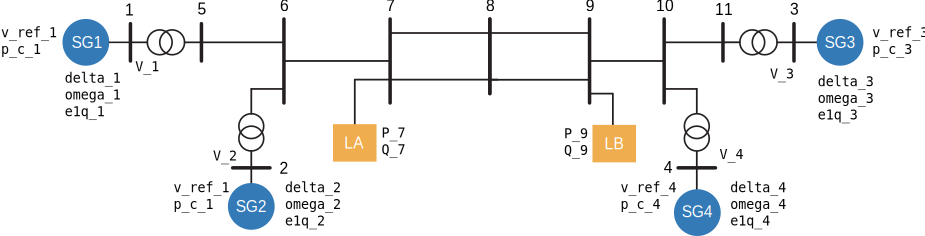

In [148]:
SVG('sp_k12p6.svg') # no ejecutar

In [149]:
from k12p6 import k12p6_class

## Initialization

In [150]:
xy_0_dict = {
"V_1":1.0,"V_2":1.0,"V_3":1.0,"V_4":1.0,
"V_5":1.0,"V_6":1.0,"V_7":1.0,"V_8":1.0,
"V_9":1.0,"V_10":1.0,"V_11":1.0
}

In [151]:
grid = k12p6_class()

In [152]:
K_delta = 0.001
K_sec = 0.01
K_a = 100.0
T_r = 0.02
D = 1
grid.initialize([{'P_7':-967e6,'P_9':-1_767e6,'Q_7':100e6,'Q_9':250e6,
                  'K_delta_1':K_delta,'K_delta_2':K_delta,
                  'K_delta_3':K_delta,'K_delta_4':K_delta,
                  'K_a_1':K_a,'K_a_2':K_a,'K_a_3':K_a,'K_a_4':K_a,
                  'T_r_1':T_r,'T_r_2':T_r,'T_r_3':T_r,'T_r_4':T_r,
                  'p_c_1':700/900,'p_c_2':700/900,'p_c_4':700/900,
                  'v_ref_1':1.03,'v_ref_2':1.01,'v_ref_3':1.03,'v_ref_4':1.01,
                  'K_sec_1':0,'K_sec_2':0,'K_sec_3':K_sec,'K_sec_4':0,
                  'D_1':D,'D_2':D,'D_3':D,'D_4':D}],
                   xy_0_dict,compile=True)



True

In [153]:
grid.get_value('T_r_1')

0.02

## Small signal analysis

### Eigenvalues

In [154]:
ssa.eval_A(grid)
damp = ssa.damp_report(grid)
damp.sort_values('Damp')

,Real,Imag,Freq.,Damp
Mode 14,2.868648e-02,-3.516455,0.559661,-0.008158
Mode 13,2.868648e-02,3.516455,0.559661,-0.008158
Mode 10,-4.517375e-01,-6.310767,1.004390,0.071399
Mode 9,-4.517375e-01,6.310767,1.004390,0.071399
Mode 8,-4.746835e-01,-6.151548,0.979049,0.076936
Mode 7,-4.746835e-01,6.151548,0.979049,0.076936
Mode 20,-9.998950e-02,-0.553233,0.088050,0.177855
Mode 19,-9.998950e-02,0.553233,0.088050,0.177855
Mode 5,-2.430666e+01,-15.305236,2.435904,0.846217
Mode 4,-2.430666e+01,15.305236,2.435904,0.846217


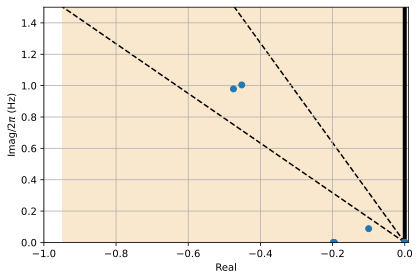

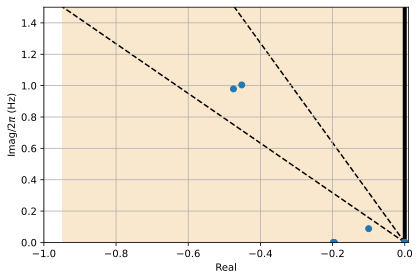

In [155]:
ssa.plot_eig(grid,x_min=-1,x_max=0.01,y_min=0,y_max=1.5)

### Participation factors

In [156]:
ssa.participation(grid)['Mode 11'].abs().round(2)

delta_1    0.01
omega_1    0.01
e1q_1      0.09
e1d_1      0.09
v_c_1      0.01
xi_v_1     0.00
p_m_1      0.00
delta_2    0.01
omega_2    0.01
e1q_2      0.07
e1d_2      0.05
v_c_2      0.01
xi_v_2     0.00
p_m_2      0.00
delta_3    0.02
omega_3    0.02
e1q_3      0.20
e1d_3      0.19
v_c_3      0.03
xi_v_3     0.00
p_m_3      0.00
delta_4    0.02
omega_4    0.02
e1q_4      0.13
e1d_4      0.13
v_c_4      0.02
xi_v_4     0.00
p_m_4      0.00
xi_freq    0.00
Name: Mode 11, dtype: float64

### Mode shapes

In [157]:
ssa.shape2df(grid).loc['Mode 1'][[f'e1q_{it+1}' for it in range(4)]]
ssa.shape2df(grid).loc['Mode 1'][[f'omega_{it+1}' for it in range(4)]]

omega_1     0.00∠  0.0
omega_2    0.00∠-180.0
omega_3     0.00∠180.0
omega_4     0.00∠ -0.0
Name: Mode 1, dtype: object

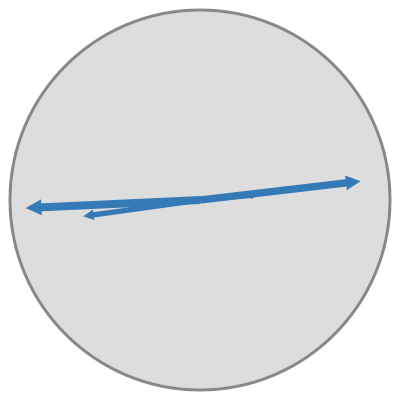

In [158]:
svg_string = ssa.plot_shapes(grid,mode='Mode 13',states=[f'omega_{it+1}' for it in range(4)])
SVG(svg_string)

## Time domain simulation

In [189]:
grid = k12p6_class()

K_delta = 0.001
K_sec = 0.01
K_a = 100.0
T_r = 0.02
D = 1
grid.initialize([{'Dt':0.01,'decimation':1,
                      'P_7':-967e6,'P_9':-1_767e6,'Q_7':100e6,'Q_9':250e6,
                  'K_delta_1':K_delta,'K_delta_2':K_delta,
                  'K_delta_3':K_delta,'K_delta_4':K_delta,
                  'K_a_1':K_a,'K_a_2':K_a,'K_a_3':K_a,'K_a_4':K_a,
                  'T_r_1':T_r,'T_r_2':T_r,'T_r_3':T_r,'T_r_4':T_r,
                  'p_c_1':700/900,'p_c_2':700/900,'p_c_4':700/900,
                  'v_ref_1':1.03,'v_ref_2':1.01,'v_ref_3':1.03,'v_ref_4':1.01,
                  'v_pss_1':0,'v_pss_3':0,
                  'K_sec_1':0,'K_sec_2':0,'K_sec_3':K_sec,'K_sec_4':0,
                  'D_1':D,'D_2':D,'D_3':D,'D_4':D}],
                   xy_0_dict,compile=True)

grid.simulate([
         {'t_end': 1.0,'v_ref_1': 1.03, 
         'H_1':1e8,'H_2':1e8,'H_3':1e8,'H_4':1e8
         },
         {'t_end':15.0,'v_ref_1': 1.03*1.05}],'prev');

In [192]:
V_1_ini = grid.get_values('V_1')[0]
V_1_end = grid.get_values('V_1')[-1]
ΔV_1 = V_1_end - V_1_ini
ΔV_1_e = (1-1/np.e)*ΔV_1
V_1_e = ΔV_1_e + V_1_ini
idx = np.argmax(grid.get_values('V_1')>V_1_e)
Tau_V = grid.T[idx] -1


# K_a = 150 V,p_e 0.08,0.11 0.09
# K_a = 100 V,p_e 0.13,0.16 
# K_a =  50  0.25,0.31 0.22
p_e_1_ini = grid.get_values('p_e_1')[0]
p_e_1_end = grid.get_values('p_e_1')[-1]
Δp_e_1 = p_e_1_end - p_e_1_ini
Δp_e_1_e = (1-1/np.e)*Δp_e_1
p_e_1_e = Δp_e_1_e + p_e_1_ini
idx = np.argmax(grid.get_values('p_e_1')>p_e_1_e)
Tau_p_e = grid.T[idx] -1   


Tau = Tau_p_e

w = 2*np.pi*0.5
phi_sm = np.angle(1/(Tau*1j*w+1))
T_2 = 0.1

def res(x):
    T_1 = x
    phi = np.angle((T_1*1j*w+1)/(T_2*1j*w+1))
    return phi + phi_sm

T_1 = sopt.newton(res,0.1)[0]
print(f'T_1 = {T_1:0.2f} s')

gain_l = np.abs((T_1*1j*w+1)/(T_2*1j*w+1))
gain_l

gain_p = np.abs((1)/(Tau*1j*w+1))
gain_p

T_1 = 0.31 s


array([0.89347637])

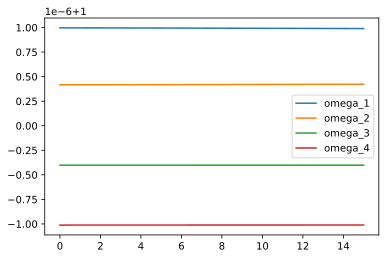

In [193]:
fig,axes = plt.subplots()
axes.plot(grid.T,grid.get_values('omega_1'),label='omega_1')
axes.plot(grid.T,grid.get_values('omega_2'),label='omega_2')
axes.plot(grid.T,grid.get_values('omega_3'),label='omega_3')
axes.plot(grid.T,grid.get_values('omega_4'),label='omega_4')
axes.legend()

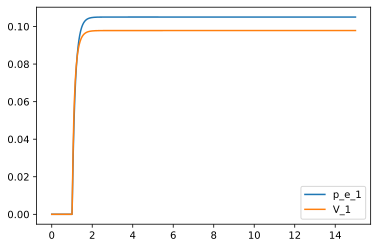

In [194]:
fig,axes = plt.subplots()
axes.plot(grid.T,grid.get_values('p_e_1')-grid.get_values('p_e_1')[0],label='p_e_1')
axes.plot(grid.T,2*(grid.get_values('V_1')-grid.get_values('V_1')[0]),label='V_1')

#axes.set_xlim((0,3))
axes.legend()

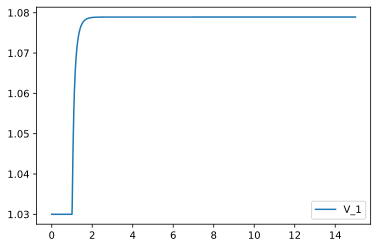

In [195]:
fig,axes = plt.subplots()
axes.plot(grid.T,grid.get_values('V_1'),label='V_1')
#axes.set_xlim((0,3))
axes.legend()

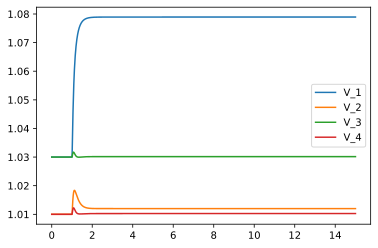

In [196]:
fig,axes = plt.subplots()
axes.plot(grid.T,grid.get_values('V_1'),label='V_1')
axes.plot(grid.T,grid.get_values('V_2'),label='V_2')
axes.plot(grid.T,grid.get_values('V_3'),label='V_3')
axes.plot(grid.T,grid.get_values('V_4'),label='V_4')
axes.legend()
#axes.set_xlim((0,2))

### PSS 

In [197]:
Δt = 0.01  # latencia del control (cada cuanto se ejecuta el controlador)
grid_pss = k12p6_class()
times = np.arange(0,15,Δt)   # tiempos para los cuales se ejecutará el control 
                             # (en este caso la simulación sera de 15 s)

K_delta = 0.001
K_sec = 0.01
#K_a = 20.0
T_r = 0.02
D = 1
grid_pss.initialize([{'Dt':0.01,'decimation':1,
                      'P_7':-967e6,'P_9':-1_767e6,'Q_7':100e6,'Q_9':250e6,
                  'K_delta_1':K_delta,'K_delta_2':K_delta,
                  'K_delta_3':K_delta,'K_delta_4':K_delta,
                  'K_a_1':K_a,'K_a_2':K_a,'K_a_3':K_a,'K_a_4':K_a,
                  'T_r_1':T_r,'T_r_2':T_r,'T_r_3':T_r,'T_r_4':T_r,
                  'p_c_1':700/900,'p_c_2':700/900,'p_c_4':700/900,
                  'v_ref_1':1.03,'v_ref_2':1.01,'v_ref_3':1.03,'v_ref_4':1.01,
                  'v_pss_1':0,'v_pss_3':0,
                  'K_sec_1':0,'K_sec_2':0,'K_sec_3':K_sec,'K_sec_4':0,
                  'D_1':D,'D_2':D,'D_3':D,'D_4':D}],
                   xy_0_dict,compile=True)

# del estado inicial se guardan las entradas o variables necesarias
v_ref_1_0 = grid_pss.get_value('v_ref_1') # se guarda la tensión de excitación inicial
omega_1_0 = grid_pss.get_value('omega_1') # se guarda la tensión de excitación inicial
omega_3_0 = grid_pss.get_value('omega_3') # se guarda la tensión de excitación inicial

# diseño del control:
## PSS
K_stab_1,K_stab_3 = 70.0/gain_l,70.0/gain_l
x_l_1,x_l_3 = 0.0,0.0
T_1_1,T_1_3 = 0.1,0.1
T_2_1,T_2_3 = 0.1,0.1

V_s = 0*times
U_l = 0*times

it = 0
for t in times:
    
    # perturbaciones o cambios de referencia
    v_ref_1 = v_ref_1_0
    if t>1.0: # se aplica un cambio para t = 1 s 
        #p_m = 1.2*p_m_0  # se propone como nuevo valor de potencia de un 20% más que el valor inicial
        v_ref_1 = 1.2*v_ref_1_0
    
    # medición de la tensión en terminales
    omega_1 = grid_pss.get_value('omega_1')
    omega_3 = grid_pss.get_value('omega_3')
    
    # Ley de control:
    ## PSS 1
    u_l_1 = (omega_1 - omega_1_0)   # medición de velocidad
    x_l_1 = x_l_1 + Δt*(u_l_1 - x_l_1)/T_2_1          # compensador de adelanto        
    v_pss_1 = K_stab_1*(T_1_1/T_2_1*(u_l_1-x_l_1) + x_l_1)
    
    ## PSS 3
    u_l_3 = (omega_3 - omega_3_0)   # medición de velocidad
    x_l_3 = x_l_1 + Δt*(u_l_3 - x_l_3)/T_2_3          # compensador de adelanto        
    v_pss_3 = K_stab_3*(T_1_3/T_2_3*(u_l_3-x_l_3) + x_l_3)
    
    # se actualiza v_f y se ejecuta la simulación para el nuevo tiempo t    
    events=[{'t_end':t,'v_pss_1':v_pss_1,'v_pss_3':v_pss_3,'v_ref_1':v_ref_1}]
    grid_pss.run(events)
    
    U_l[it] = u_l_1
    V_s[it] = v_pss_1
    it += 1

grid_pss.post();

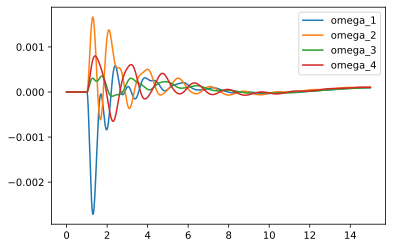

In [198]:
fig,axes = plt.subplots()
axes.plot(grid_pss.T,grid_pss.get_values('omega_1')-1,label='omega_1')
axes.plot(grid_pss.T,grid_pss.get_values('omega_2')-1,label='omega_2')
axes.plot(grid_pss.T,grid_pss.get_values('omega_3')-1,label='omega_3')
axes.plot(grid_pss.T,grid_pss.get_values('omega_4')-1,label='omega_4')
axes.legend()

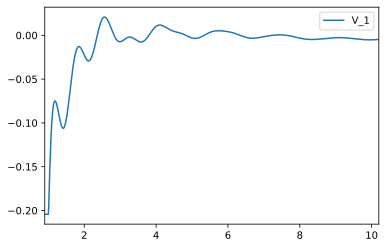

In [186]:
fig,axes = plt.subplots()
axes.plot(grid_pss.T,grid_pss.get_values('V_1')-grid_pss.get_values('V_1')[-1],label='V_1')
axes.set_xlim(0.9,10.2)
axes.legend()

In [42]:
V_1_ini = grid_pss.get_values('V_1')[0]
V_1_end = grid_pss.get_values('V_1')[-1]
ΔV_1 = V_1_end - V_1_ini
ΔV_1_e = (1-1/np.e)*ΔV_1
V_1_e = ΔV_1_e + V_1_ini
idx = np.argmax(grid_pss.get_values('V_1')>V_1_e)
Tau = grid_pss.T[idx] -1
Tau

array([0.6])

array([1.71642781])

array([5.23213659])

array([0.46864979])

In [ ]:
#ciclos = 1/(2*pi*zeta)
ciclos = 2
zeta = 1/(2*np.pi*ciclos)
zeta

In [ ]:
-0.003*0.37